# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
#print("Hello World!")
# standard
import os
import itertools
import pandas as pd
import numpy as np
import pvlib

# Visualization
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap, LogNorm
import seaborn as sns
from pvlib import spectrum, solarposition, irradiance, atmosphere

from scipy.integrate import trapezoid




In [3]:
ls

data/  models/  README.md  requirements.txt  sample.ipynb  Untitled.ipynb


In [4]:
pwd

'/home/kostas/school/Q4/proj/JupyterProject'

In [5]:
import os
print(os.path.exists('data/2019-02-27/2019022708.CSV'))


True


In [6]:
!ls -R data/

data/:
2019-02-27  2019-04-20	2019-10-22

data/2019-02-27:
2019022704.CSV	2019022708.CSV	2019022712.CSV	2019022716.CSV	2019022720.CSV
2019022705.CSV	2019022709.CSV	2019022713.CSV	2019022717.CSV	2019022721.CSV
2019022706.CSV	2019022710.CSV	2019022714.CSV	2019022718.CSV	2019022722.CSV
2019022707.CSV	2019022711.CSV	2019022715.CSV	2019022719.CSV

data/2019-04-20:
2019042004.CSV	2019042008.CSV	2019042012.CSV	2019042016.CSV	2019042020.CSV
2019042005.CSV	2019042009.CSV	2019042013.CSV	2019042017.CSV	2019042021.CSV
2019042006.CSV	2019042010.CSV	2019042014.CSV	2019042018.CSV	2019042022.CSV
2019042007.CSV	2019042011.CSV	2019042015.CSV	2019042019.CSV

data/2019-10-22:
2019102204.CSV	2019102208.CSV	2019102212.CSV	2019102216.CSV	2019102220.CSV
2019102205.CSV	2019102209.CSV	2019102213.CSV	2019102217.CSV	2019102221.CSV
2019102206.CSV	2019102210.CSV	2019102214.CSV	2019102218.CSV	2019102222.CSV
2019102207.CSV	2019102211.CSV	2019102215.CSV	2019102219.CSV


In [9]:
spectra_data = pd.read_csv('data/2019-02-27/2019022708.CSV')
# metadata = spectra_data[0:6].T.reset_index().rename(columns={'index':'Date', 0:'Time', 1:'Memo', 2:'Sensor', 3:'Exposure Time(msec)', 4:'Sensor Temp(deg)', 5:'Power(V)'}).drop(0,axis=0)
# spectra_clean = spectra_data.dropna(axis=1, how='any') ## removing last column of NAN
# spectra_clean = spectra_clean[6:].T.reset_index(drop=True)
#metadata
spectra_data.head()

,Date,2019/02/27,2019/02/27.1,2019/02/27.2,2019/02/27.3,2019/02/27.4,2019/02/27.5,2019/02/27.6,2019/02/27.7,2019/02/27.8,...,2019/02/27.51,2019/02/27.52,2019/02/27.53,2019/02/27.54,2019/02/27.55,2019/02/27.56,2019/02/27.57,2019/02/27.58,2019/02/27.59,Unnamed: 61
0,Time,08:00:00,08:01:00,08:02:00,08:03:00,08:04:00,08:05:00,08:06:00,08:07:00,08:08:00,...,08:51:00,08:52:00,08:53:00,08:54:00,08:55:00,08:56:00,08:57:00,08:58:00,08:59:00,NaN
1,Memo,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,...,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,SEAC MS-711,NaN
2,Sensor,MS-711,MS-711,MS-711,MS-711,MS-711,MS-711,MS-711,MS-711,MS-711,...,MS-711,MS-711,MS-711,MS-711,MS-711,MS-711,MS-711,MS-711,MS-711,NaN
3,Exposure Time(msec),2000,2000,1000,1000,1000,1000,1000,1000,1000,...,500,200,200,200,200,200,200,200,200,NaN
4,Sensor Temp.(deg),24.6,24.5,24.5,24.5,24.6,24.5,24.6,24.6,24.5,...,24.6,24.6,24.6,24.6,24.6,24.7,24.5,24.7,24.6,NaN


In [14]:
metadata = spectra_data[0:6].T
metadata.columns = metadata.iloc[0]
metadata = metadata[1:].reset_index().rename(columns={'index':'Date'}).reset_index(drop=True)
metadata.head()


Date,Date,Time,Memo,Sensor,Exposure Time(msec),Sensor Temp.(deg),Power(V)
0,2019/02/27,08:00:00,SEAC MS-711,MS-711,2000,24.6,5.9
1,2019/02/27.1,08:01:00,SEAC MS-711,MS-711,2000,24.5,5.9
2,2019/02/27.2,08:02:00,SEAC MS-711,MS-711,1000,24.5,5.9
3,2019/02/27.3,08:03:00,SEAC MS-711,MS-711,1000,24.5,5.9
4,2019/02/27.4,08:04:00,SEAC MS-711,MS-711,1000,24.6,5.9


In [16]:
metadata['Date'] = metadata['Date'].str.split('.').str[0]
metadata['DateTime'] = pd.to_datetime(metadata['Date'] + ' ' + metadata['Time'])
metadata.dropna()

Date,Date,Time,Memo,Sensor,Exposure Time(msec),Sensor Temp.(deg),Power(V),DateTime
0,2019/02/27,08:00:00,SEAC MS-711,MS-711,2000,24.6,5.9,2019-02-27 08:00:00
1,2019/02/27,08:01:00,SEAC MS-711,MS-711,2000,24.5,5.9,2019-02-27 08:01:00
2,2019/02/27,08:02:00,SEAC MS-711,MS-711,1000,24.5,5.9,2019-02-27 08:02:00
3,2019/02/27,08:03:00,SEAC MS-711,MS-711,1000,24.5,5.9,2019-02-27 08:03:00
4,2019/02/27,08:04:00,SEAC MS-711,MS-711,1000,24.6,5.9,2019-02-27 08:04:00
5,2019/02/27,08:05:00,SEAC MS-711,MS-711,1000,24.5,5.9,2019-02-27 08:05:00
6,2019/02/27,08:06:00,SEAC MS-711,MS-711,1000,24.6,5.9,2019-02-27 08:06:00
7,2019/02/27,08:07:00,SEAC MS-711,MS-711,1000,24.6,5.9,2019-02-27 08:07:00
8,2019/02/27,08:08:00,SEAC MS-711,MS-711,1000,24.5,5.9,2019-02-27 08:08:00
9,2019/02/27,08:09:00,SEAC MS-711,MS-711,1000,24.6,5.9,2019-02-27 08:09:00


In [18]:
spectra_clean = spectra_data.dropna(axis=1, how='any') ## removing last column of NAN
spectra = spectra_clean[6:].reset_index(drop=True)

#spectra.columns = spectra.iloc[0]  # Assign the first row as column names

# Drop the first row since it's now redundant
spectra = spectra[1:].reset_index(drop=True).rename(columns={'Date':'Wavelength'})
spectra.head()

,Wavelength,2019/02/27,2019/02/27.1,2019/02/27.2,2019/02/27.3,2019/02/27.4,2019/02/27.5,2019/02/27.6,2019/02/27.7,2019/02/27.8,...,2019/02/27.50,2019/02/27.51,2019/02/27.52,2019/02/27.53,2019/02/27.54,2019/02/27.55,2019/02/27.56,2019/02/27.57,2019/02/27.58,2019/02/27.59
0,300.00,0.16,0.17,0.20,0.09,0.08,0.27,0.16,0.14,0.07,...,0.60,0.78,0.58,0.17,0.65,0.85,0.72,1.12,1.40,0.31
1,301.00,0.16,0.19,0.13,0.02,0.13,0.20,0.23,0.13,0.14,...,0.41,0.87,1.25,0.44,0.34,0.70,0.43,1.39,1.24,1.18
2,302.00,0.15,0.22,0.18,0.10,0.25,0.23,0.27,0.23,0.06,...,0.71,0.85,1.25,1.24,0.60,0.86,0.85,0.80,0.60,1.23
3,303.00,0.12,0.23,0.23,0.05,0.10,0.24,0.14,0.18,0.22,...,0.62,0.72,0.48,0.75,0.19,1.13,1.02,1.11,1.38,1.31
4,304.00,0.20,0.18,0.23,0.04,0.30,0.32,0.17,0.20,0.22,...,0.54,1.08,1.25,1.02,0.91,0.91,0.91,1.24,1.49,1.56


In [20]:
spectra.shape

(801, 61)

In [22]:
time = metadata['DateTime'].dropna()
# lat = 37
# lon = -100
# Use Vertigo's lat and lon
lat = 51.44623
lon = 5.48505
time

0    2019-02-27 08:00:00
1    2019-02-27 08:01:00
2    2019-02-27 08:02:00
3    2019-02-27 08:03:00
4    2019-02-27 08:04:00
5    2019-02-27 08:05:00
6    2019-02-27 08:06:00
7    2019-02-27 08:07:00
8    2019-02-27 08:08:00
9    2019-02-27 08:09:00
10   2019-02-27 08:10:00
11   2019-02-27 08:11:00
12   2019-02-27 08:12:00
13   2019-02-27 08:13:00
14   2019-02-27 08:14:00
15   2019-02-27 08:15:00
16   2019-02-27 08:16:00
17   2019-02-27 08:17:00
18   2019-02-27 08:18:00
19   2019-02-27 08:19:00
20   2019-02-27 08:20:00
21   2019-02-27 08:21:00
22   2019-02-27 08:22:00
23   2019-02-27 08:23:00
24   2019-02-27 08:24:00
25   2019-02-27 08:25:00
26   2019-02-27 08:26:00
27   2019-02-27 08:27:00
28   2019-02-27 08:28:00
29   2019-02-27 08:29:00
30   2019-02-27 08:30:00
31   2019-02-27 08:31:00
32   2019-02-27 08:32:00
33   2019-02-27 08:33:00
34   2019-02-27 08:34:00
35   2019-02-27 08:35:00
36   2019-02-27 08:36:00
37   2019-02-27 08:37:00
38   2019-02-27 08:38:00
39   2019-02-27 08:39:00


In [24]:
solarposition.get_solarposition(time, lat, lon)

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
DateTime,,,,,,
2019-02-27 08:00:00,77.512669,77.586012,12.487331,12.413988,121.097241,-12.774927
2019-02-27 08:01:00,77.379908,77.452505,12.620092,12.547495,121.310500,-12.774806
2019-02-27 08:02:00,77.247432,77.319298,12.752568,12.680702,121.524067,-12.774686
2019-02-27 08:03:00,77.115245,77.186395,12.884755,12.813605,121.737945,-12.774565
2019-02-27 08:04:00,76.983350,77.053799,13.016650,12.946201,121.952135,-12.774445
2019-02-27 08:05:00,76.851748,76.921510,13.148252,13.078490,122.166641,-12.774324
2019-02-27 08:06:00,76.720443,76.789533,13.279557,13.210467,122.381463,-12.774204
2019-02-27 08:07:00,76.589438,76.657868,13.410562,13.342132,122.596603,-12.774083
2019-02-27 08:08:00,76.458735,76.526518,13.541265,13.473482,122.812065,-12.773963


In [26]:
spectra.set_index('Wavelength')


,2019/02/27,2019/02/27.1,2019/02/27.2,2019/02/27.3,2019/02/27.4,2019/02/27.5,2019/02/27.6,2019/02/27.7,2019/02/27.8,2019/02/27.9,...,2019/02/27.50,2019/02/27.51,2019/02/27.52,2019/02/27.53,2019/02/27.54,2019/02/27.55,2019/02/27.56,2019/02/27.57,2019/02/27.58,2019/02/27.59
Wavelength,,,,,,,,,,,,,,,,,,,,,
300.00,0.16,0.17,0.20,0.09,0.08,0.27,0.16,0.14,0.07,0.21,...,0.60,0.78,0.58,0.17,0.65,0.85,0.72,1.12,1.40,0.31
301.00,0.16,0.19,0.13,0.02,0.13,0.20,0.23,0.13,0.14,0.21,...,0.41,0.87,1.25,0.44,0.34,0.70,0.43,1.39,1.24,1.18
302.00,0.15,0.22,0.18,0.10,0.25,0.23,0.27,0.23,0.06,0.09,...,0.71,0.85,1.25,1.24,0.60,0.86,0.85,0.80,0.60,1.23
303.00,0.12,0.23,0.23,0.05,0.10,0.24,0.14,0.18,0.22,0.27,...,0.62,0.72,0.48,0.75,0.19,1.13,1.02,1.11,1.38,1.31
304.00,0.20,0.18,0.23,0.04,0.30,0.32,0.17,0.20,0.22,0.15,...,0.54,1.08,1.25,1.02,0.91,0.91,0.91,1.24,1.49,1.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096.00,82.18,87.03,88.13,89.67,90.39,89.55,93.35,100.77,96.05,98.33,...,203.55,193.99,220.01,216.79,226.57,234.26,238.86,234.70,240.06,219.13
1097.00,82.15,81.40,82.10,87.03,84.39,90.69,92.95,92.79,99.02,101.01,...,192.62,196.79,190.30,218.79,209.64,233.15,200.42,227.79,237.25,233.15
1098.00,79.36,80.40,79.90,80.89,87.70,82.50,86.86,93.82,92.68,97.97,...,199.61,194.40,188.24,181.81,196.28,212.35,189.49,207.04,206.65,207.38


In [28]:
spectra = spectra.apply(pd.to_numeric, errors='coerce')
print(spectra.dtypes)

Wavelength       float64
2019/02/27       float64
2019/02/27.1     float64
2019/02/27.2     float64
2019/02/27.3     float64
                  ...   
2019/02/27.55    float64
2019/02/27.56    float64
2019/02/27.57    float64
2019/02/27.58    float64
2019/02/27.59    float64
Length: 61, dtype: object


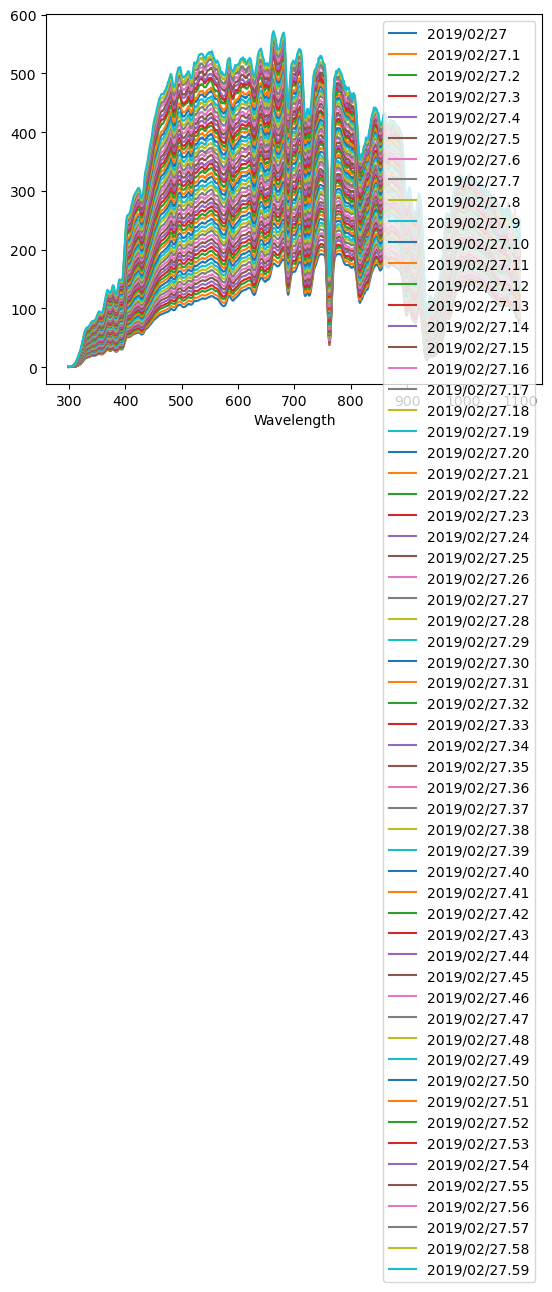

In [30]:
# plt.figure()
#for i in range(1,spectra.shape[1]):
#plt.plot(spectra.index, spectra["2019/02/27"])
spectra.plot(x='Wavelength')
#spectra.plot()
# plt.xticks(300, 1100)
# plt.ylim(0, 1.8)
# plt.title(r"Day 80 1984, $\tau=0.1$, Wv=0.5 cm")
# plt.ylabel(r"Irradiance ($W m^{-2} nm^{-1}$)")
# plt.xlabel(r"Wavelength ($nm$)")
# time_labels = time.strftime("%H:%M %p")
# labels = [
#     "AM {:0.02f}, Z{:0.02f}, {}".format(*vals)
#     for vals in zip(time_labels)
# ]
# plt.legend(labels)
plt.show()

# APE

In [32]:
poa_global = spectra['2019/02/27.30'].apply(pd.to_numeric, errors='coerce')
wavelength = spectra['Wavelength'].apply(pd.to_numeric, errors='coerce')

In [33]:
poa_global.shape

(801,)

In [34]:
wavelength.shape

(801,)

In [35]:
type

type

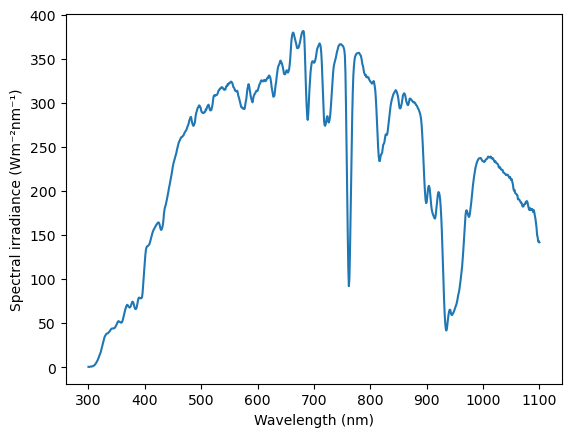

In [38]:
plt.figure()
plt.plot(wavelength, poa_global)
plt.ylabel(r"Spectral irradiance (Wm⁻²nm⁻¹)")
plt.xlabel(r"Wavelength (nm)")
# time_labels = times.strftime("%H%M")
# labels = [
#     f"{t}, {am_:0.02f}"
#     for t, am_ in zip(time_labels, relative_airmass)
# ]
# plt.legend(labels, title="Time, AM")
plt.show()

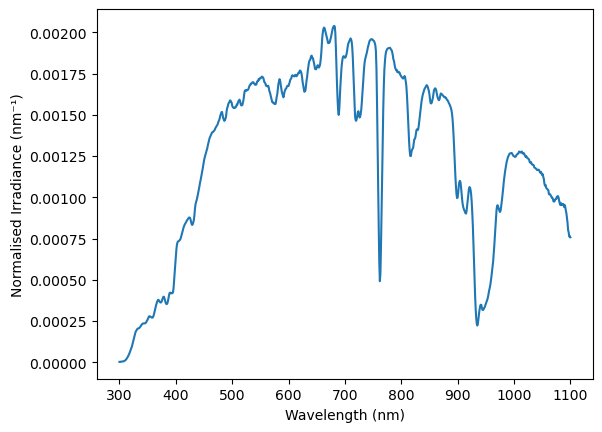

In [44]:
broadband_irradiance = trapezoid(poa_global, wavelength, axis=0)

spectral_poa_normalised = poa_global / broadband_irradiance

# Plot the normalised spectra
plt.figure()
plt.plot(wavelength, spectral_poa_normalised)
plt.ylabel(r"Normalised Irradiance (nm⁻¹)")
plt.xlabel(r"Wavelength (nm)")
plt.show()

In [46]:
spectra = pd.DataFrame(poa_global).T  # convert to dataframe and transpose
# spectra.index = time_labels  # add time index
spectra.columns = wavelength  # add wavelength column headers

ape = spectrum.average_photon_energy(spectra)

In [48]:
ape

2019/02/27.30    1.722752
dtype: float64

# AI

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DAE(nn.Module):
    def __init__(self):
        super(DAE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(801, 400),  
            nn.ReLU(),
            nn.Linear(400, 200),   
            nn.ReLU(),
            nn.Linear(200, 100),    
            nn.ReLU(),
            nn.Linear(100, 6)       
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(6, 100),      
            nn.ReLU(),
            nn.Linear(100, 200),    
            nn.ReLU(),
            nn.Linear(200, 400),  
            nn.ReLU(),
            nn.Linear(400, 801)   
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [33]:
net = DAE()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)


Using device: cuda


In [34]:
criterion = nn.MSELoss
optimizer = torch.optim.AdamW(net.parameters(), lr=0.0001)

In [35]:
# Step 1: Drop the 'Wavelength' column
spectra_no_wavelength = spectra.drop(columns='Wavelength')

# Step 2: Transpose the DataFrame so each minute becomes a row
spectra_transposed = spectra_no_wavelength.T

# Step 3: Convert to PyTorch tensor
data_tensor = torch.tensor(spectra_transposed.values, dtype=torch.float32)

print("Tensor shape:", data_tensor.shape)  # Should be (60, 801) for 60 minutes

Tensor shape: torch.Size([60, 801])


In [36]:
from torch.utils.data import TensorDataset, DataLoader

# Move model to device
net = net.to(device)


# Min-max normalization
min_vals = data_tensor.min(dim=0, keepdim=True).values
max_vals = data_tensor.max(dim=0, keepdim=True).values

# Avoid divide-by-zero by adding a small epsilon
normalized_tensor = (data_tensor - min_vals) / (max_vals - min_vals + 1e-8)


# Wrap data into a TensorDataset and DataLoader
dataset = TensorDataset(normalized_tensor)
dataloader = DataLoader(dataset, batch_size=60, shuffle=True)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(net.parameters(), lr=1e-3)

# Training loop
n_epochs = 300
net.train()

for epoch in range(n_epochs):
    epoch_loss = 0.0
    for batch in dataloader:
        inputs = batch[0].to(device)

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, inputs)  # Reconstruction loss

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)  # Weighted sum

    avg_loss = epoch_loss / len(dataset)
    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {avg_loss:.6f}")


Epoch [1/300], Loss: 0.320892
Epoch [2/300], Loss: 0.308780
Epoch [3/300], Loss: 0.293860
Epoch [4/300], Loss: 0.270228
Epoch [5/300], Loss: 0.229511
Epoch [6/300], Loss: 0.164547
Epoch [7/300], Loss: 0.079691
Epoch [8/300], Loss: 0.044105
Epoch [9/300], Loss: 0.101780
Epoch [10/300], Loss: 0.042309
Epoch [11/300], Loss: 0.011071
Epoch [12/300], Loss: 0.020352
Epoch [13/300], Loss: 0.033689
Epoch [14/300], Loss: 0.037625
Epoch [15/300], Loss: 0.032331
Epoch [16/300], Loss: 0.022961
Epoch [17/300], Loss: 0.017324
Epoch [18/300], Loss: 0.021145
Epoch [19/300], Loss: 0.028756
Epoch [20/300], Loss: 0.026783
Epoch [21/300], Loss: 0.017816
Epoch [22/300], Loss: 0.013182
Epoch [23/300], Loss: 0.014865
Epoch [24/300], Loss: 0.015858
Epoch [25/300], Loss: 0.013425
Epoch [26/300], Loss: 0.009249
Epoch [27/300], Loss: 0.006542
Epoch [28/300], Loss: 0.007372
Epoch [29/300], Loss: 0.008919
Epoch [30/300], Loss: 0.007737
Epoch [31/300], Loss: 0.005435
Epoch [32/300], Loss: 0.005238
Epoch [33/300], L

# Clustering

In [43]:
net.eval()

# Move normalized input to device
with torch.no_grad():
    latent_representations = net.encoder(normalized_tensor.to(device))

# Move to CPU and convert to numpy if needed
latent_representations = latent_representations.cpu()

print("Latent shape:", latent_representations.shape)  # Should be (60, 6)
print("Device", latent_representations.device)


Latent shape: torch.Size([60, 6])
Device cpu


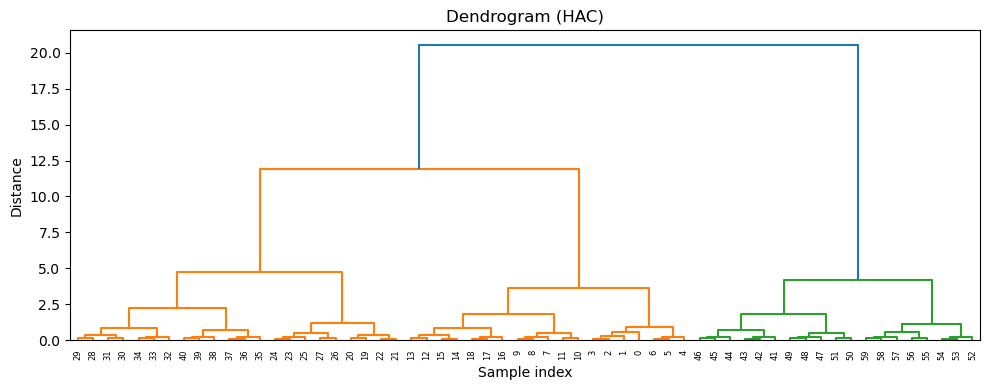

In [45]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Convert to numpy if not already
latent_np = latent_representations.numpy()

# Optional: dendrogram visualization (just for fun)
linked = linkage(latent_np, method='ward')
plt.figure(figsize=(10, 4))
# dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending', 
           show_leaf_counts=True,
           labels=np.arange(len(latent_np)))

plt.title("Dendrogram (HAC)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


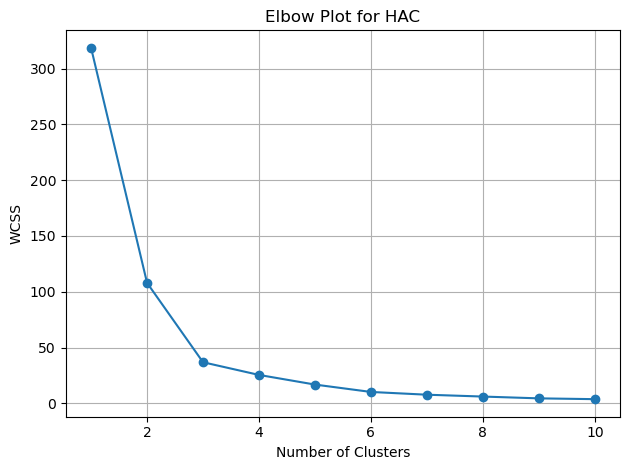

In [47]:
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

wcss = []
cluster_range = range(1, 11)

for k in cluster_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(latent_np)
    
    # Compute WCSS manually
    wcss_k = 0
    for cluster_id in np.unique(labels):
        cluster_points = latent_np[labels == cluster_id]
        centroid = cluster_points.mean(axis=0)
        distances = np.sum((cluster_points - centroid) ** 2)
        wcss_k += distances

    wcss.append(wcss_k)

# Plot WCSS (elbow)
plt.figure()
plt.plot(cluster_range, wcss, marker='o')
plt.title("Elbow Plot for HAC")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
from sklearn.cluster import AgglomerativeClustering

# HAC with 5 clusters
hac_5 = AgglomerativeClustering(n_clusters=5)
cluster_labels = hac_5.fit_predict(latent_np)


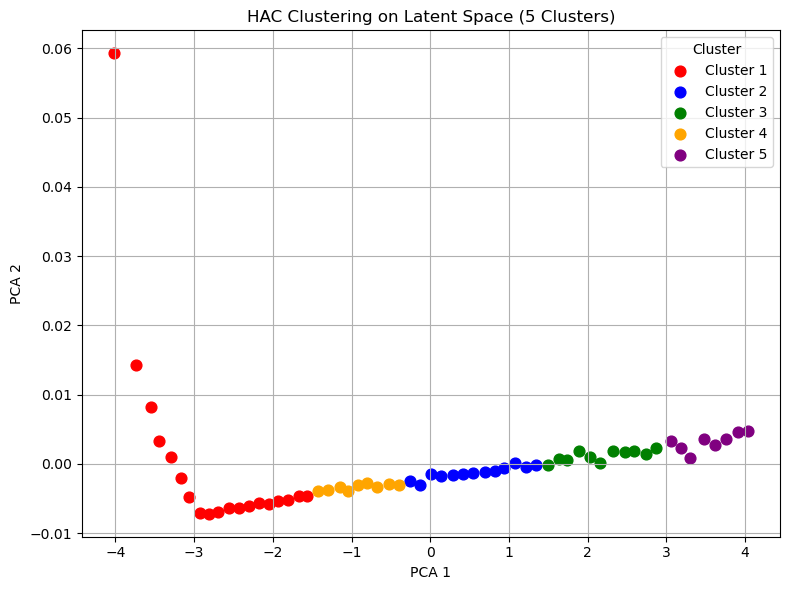

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce latent space to 2D for visualization
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_np)

# Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']
for cluster_id in np.unique(cluster_labels):
    idx = cluster_labels == cluster_id
    plt.scatter(latent_2d[idx, 0], latent_2d[idx, 1],
                label=f'Cluster {cluster_id + 1}',
                color=colors[cluster_id],
                s=60)

plt.title("HAC Clustering on Latent Space (5 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

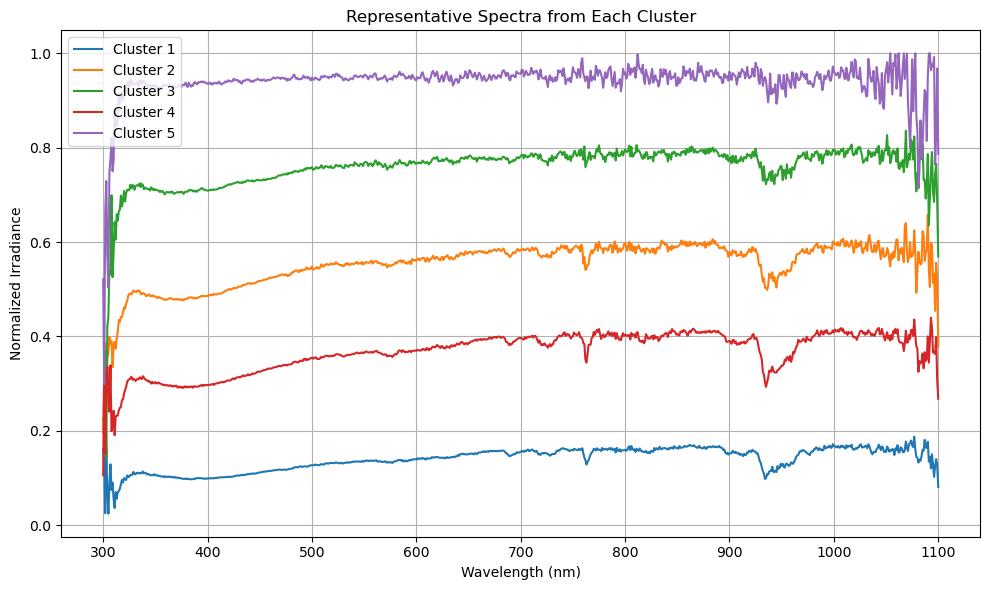

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# latent_np: (n_samples, 6)
# cluster_labels: array of shape (n_samples,)
# normalized_tensor: original input used to train DAE, shape (n_samples, 801)

representative_indices = []

for cluster_id in np.unique(cluster_labels):
    # Step 1: Get indices of samples in this cluster
    cluster_idx = np.where(cluster_labels == cluster_id)[0]
    cluster_latents = latent_np[cluster_idx]

    # Step 2: Compute pairwise distances within the cluster
    pairwise_dists = cdist(cluster_latents, cluster_latents, metric='euclidean')

    # Step 3: Sum distances for each sample
    sum_dists = pairwise_dists.sum(axis=1)

    # Step 4: Select index with minimum total distance
    rep_idx_within_cluster = np.argmin(sum_dists)
    rep_idx = cluster_idx[rep_idx_within_cluster]
    representative_indices.append(rep_idx)

# Step 5: Get the corresponding original spectra (denormalized if needed)
rep_spectra = normalized_tensor[representative_indices].cpu().numpy()

# Step 6: Plot the representative spectra
plt.figure(figsize=(10, 6))
wavelengths = spectra['Wavelength'].values  # original x-axis

for i, spec in enumerate(rep_spectra):
    plt.plot(wavelengths, spec, label=f'Cluster {i+1}')

plt.title('Representative Spectra from Each Cluster')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Irradiance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# GMM

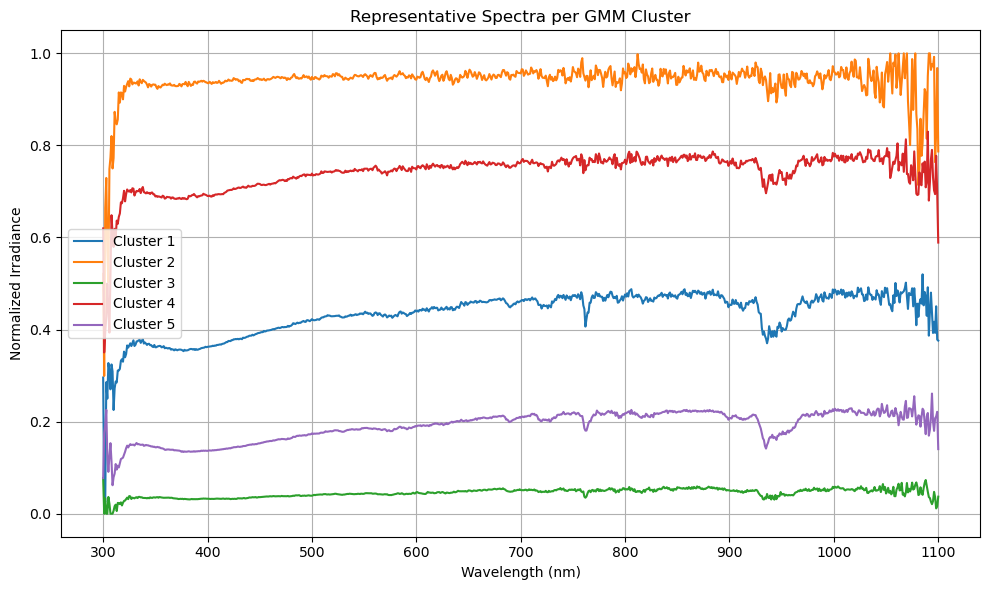

In [56]:
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Assume latent_np is (n_samples, 6) from the DAE encoder
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(latent_np)
gmm_labels = gmm.predict(latent_np)

# Step 1: Find representative sample in each cluster
representative_indices = []

for cluster_id in range(n_clusters):
    cluster_idx = np.where(gmm_labels == cluster_id)[0]
    cluster_latents = latent_np[cluster_idx]

    # Compute sum of pairwise distances
    dists = cdist(cluster_latents, cluster_latents, metric='euclidean')
    sum_dists = dists.sum(axis=1)

    # Get index of most central sample
    best_idx = cluster_idx[np.argmin(sum_dists)]
    representative_indices.append(best_idx)

# Step 2: Retrieve original spectra of the representatives
rep_spectra = normalized_tensor[representative_indices].cpu().numpy()

# Step 3: Plot original spectra (e.g., normalized irradiance vs wavelength)
wavelengths = spectra['Wavelength'].values

plt.figure(figsize=(10, 6))
for i, spec in enumerate(rep_spectra):
    plt.plot(wavelengths, spec, label=f'Cluster {i+1}')
    
plt.title('Representative Spectra per GMM Cluster')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Irradiance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


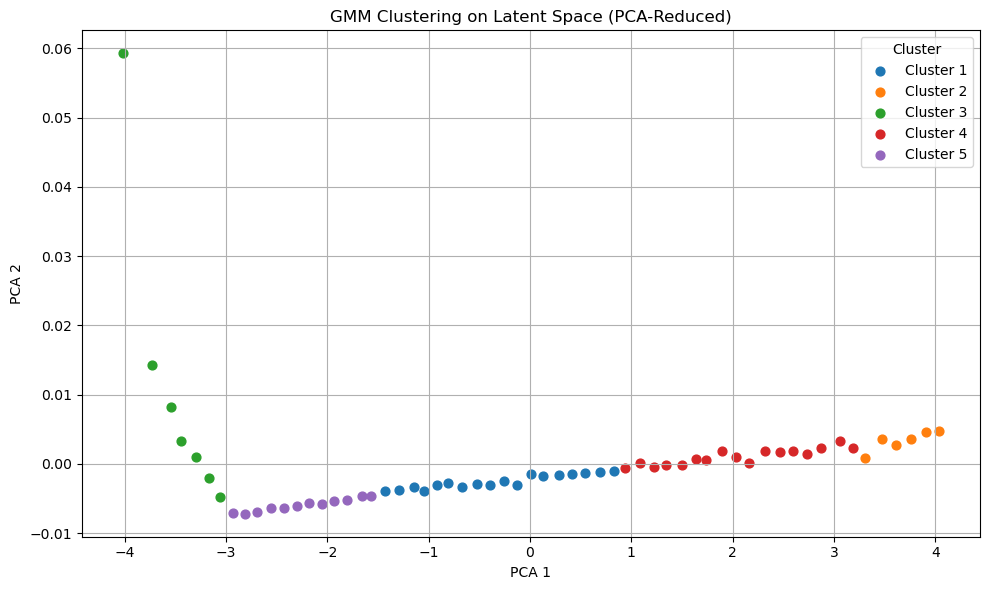

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Apply PCA to latent features
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_np)

# Step 2: Plot
plt.figure(figsize=(10, 6))

for cluster_id in range(n_clusters):
    cluster_points = latent_pca[gmm_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id + 1}', s=40)

plt.title('GMM Clustering on Latent Space (PCA-Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


→ Optimal GMM components by BIC: 2


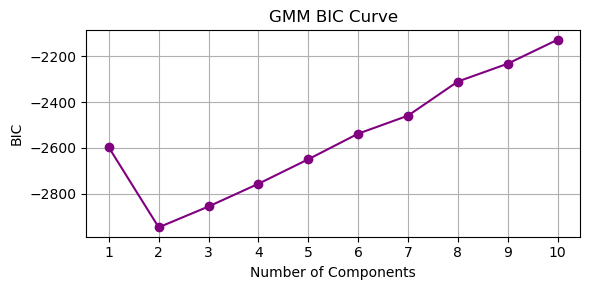

/tmp/ipykernel_5416/8048564.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', optimal_k)


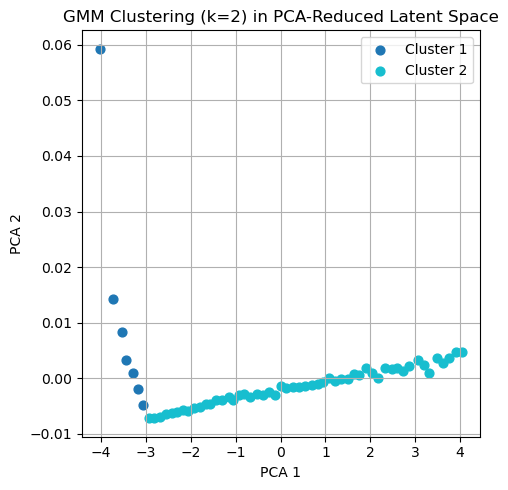

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# 1. Push model and data to CUDA
device = torch.device("cuda")
net = net.to(device).eval()
normalized_tensor_gpu = normalized_tensor.to(device)

# 2. Encode latent vectors (still on GPU), then move to CPU for sklearn
with torch.no_grad():
    latent_tensor = net.encoder(normalized_tensor_gpu)  # shape: (n_samples, 6)
    latent_np = latent_tensor.cpu().numpy()

# 3. GMM model selection with BIC
components = range(1, 11)
bics = []
for k in components:
    gmm = GaussianMixture(n_components=k, random_state=42, covariance_type='full')
    gmm.fit(latent_np)
    bics.append(gmm.bic(latent_np))

optimal_k = components[np.argmin(bics)]
print(f"→ Optimal GMM components by BIC: {optimal_k}")

# 4. Plot BIC
plt.figure(figsize=(6, 3))
plt.plot(components, bics, '-o', color='purple')
plt.title("GMM BIC Curve")
plt.xlabel("Number of Components")
plt.ylabel("BIC")
plt.xticks(components)
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Final GMM clustering
gmm_opt = GaussianMixture(n_components=optimal_k, random_state=42, covariance_type='full')
labels = gmm_opt.fit_predict(latent_np)

# 6. PCA to 2D
latent_2d = PCA(n_components=2).fit_transform(latent_np)

# 7. Plot 2D PCA with clusters
plt.figure(figsize=(5, 5))
colors = plt.cm.get_cmap('tab10', optimal_k)
for c in range(optimal_k):
    idx = labels == c
    plt.scatter(latent_2d[idx, 0], latent_2d[idx, 1], 
                color=colors(c), label=f"Cluster {c+1}", s=40)

plt.title(f"GMM Clustering (k={optimal_k}) in PCA-Reduced Latent Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
